# Can you estimate the age of an abalone?

## 📖 Background
You are working as an intern for an abalone farming operation in Japan. For operational and environmental reasons, it is an important consideration to estimate the age of the abalones when they go to market. 

Determining an abalone's age involves counting the number of rings in a cross-section of the shell through a microscope. Since this method is somewhat cumbersome and complex, you are interested in helping the farmers estimate the age of the abalone using its physical characteristics.

## 💾 The data
You have access to the following historical data ([source](https://archive.ics.uci.edu/ml/datasets/abalone)):

#### Abalone characteristics:
- "sex" - M, F, and I (infant).
- "length" - longest shell measurement.
- "diameter" - perpendicular to the length.
- "height" - measured with meat in the shell.
- "whole_wt" - whole abalone weight.
- "shucked_wt" - the weight of abalone meat.
- "viscera_wt" - gut-weight.
- "shell_wt" - the weight of the dried shell.
- "rings" - number of rings in a shell cross-section.
- "age" - the age of the abalone: the number of rings + 1.5.

***Acknowledgments**: Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn, and Wes B Ford (1994) "The Population Biology of Abalone (_Haliotis_ species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North Coast and Islands of Bass Strait", Sea Fisheries Division, Technical Report No. 48 (ISSN 1034-3288).*

## 💪 Competition challenge
Create a report that covers the following:

1. How does weight change with age for each of the three sex categories?
2. Can you estimate an abalone's age using its physical characteristics? 
3. Investigate which variables are better predictors of age for abalones.

-> IMPORT THE NECESSARY LIBRARIES AND READ THE DATA FILE

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
abalone = pd.read_csv('./data/abalone.csv')
abalone

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


-> GET SOME INFORMATION ABOUT THE DATASET

In [53]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         4177 non-null   object 
 1   length      4177 non-null   float64
 2   diameter    4177 non-null   float64
 3   height      4177 non-null   float64
 4   whole_wt    4177 non-null   float64
 5   shucked_wt  4177 non-null   float64
 6   viscera_wt  4177 non-null   float64
 7   shell_wt    4177 non-null   float64
 8   rings       4177 non-null   int64  
 9   age         4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB


-> CHECK FOR EXISTANCE OF NULL VALUES

In [54]:
abalone.isnull().sum()

sex           0
length        0
diameter      0
height        0
whole_wt      0
shucked_wt    0
viscera_wt    0
shell_wt      0
rings         0
age           0
dtype: int64

-> SOME INFORMATION ABOUT THE FEATURES

In [55]:
abalone['rings'].mean()

9.933684462532918

In [56]:
abalone['sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [57]:
abalone['whole_wt'].max()

2.8255

-> COUNTPLOT FOR GETTING GENDER-BASED COUNT 

<AxesSubplot:xlabel='sex', ylabel='count'>

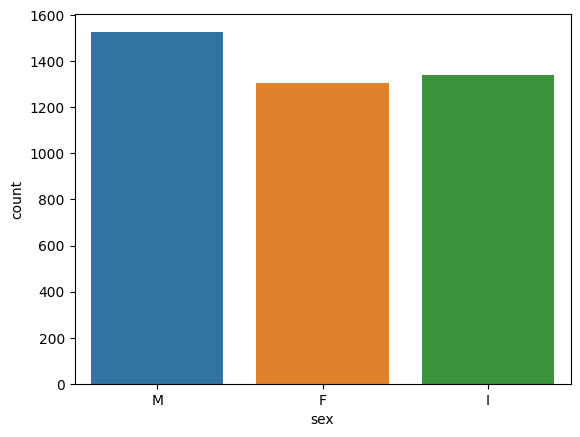

In [58]:
sns.countplot(abalone['sex'])

-> DISTRIBUTION OF "whole_wt" VALUES ACROSS THE THREE GENDERS

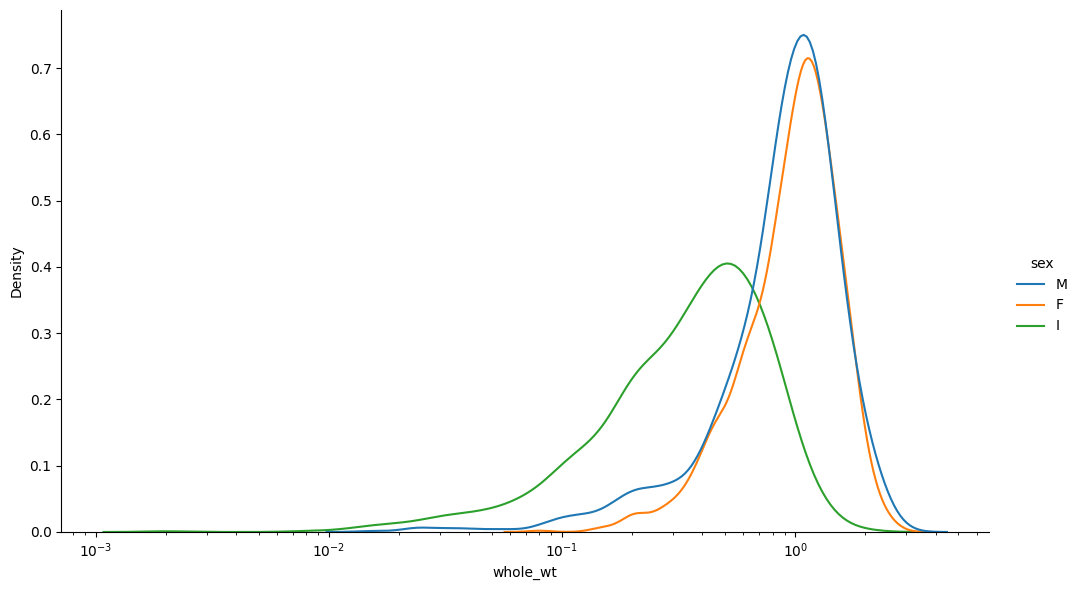

In [59]:
sns.displot(
  data=abalone,
  x="whole_wt",
  hue="sex",
  kind="kde",
  height=6,
  aspect=1.7,
  log_scale=10
)

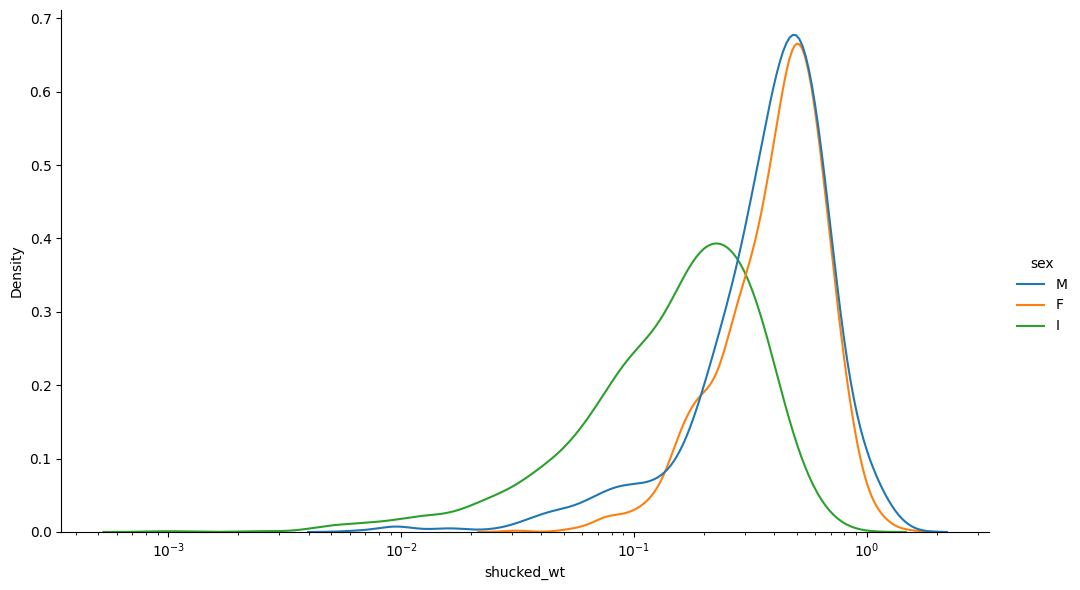

In [60]:
sns.displot(
  data=abalone,
  x="shucked_wt",
  hue="sex",
  kind="kde",
  height=6,
  aspect=1.7,
  log_scale=10
)

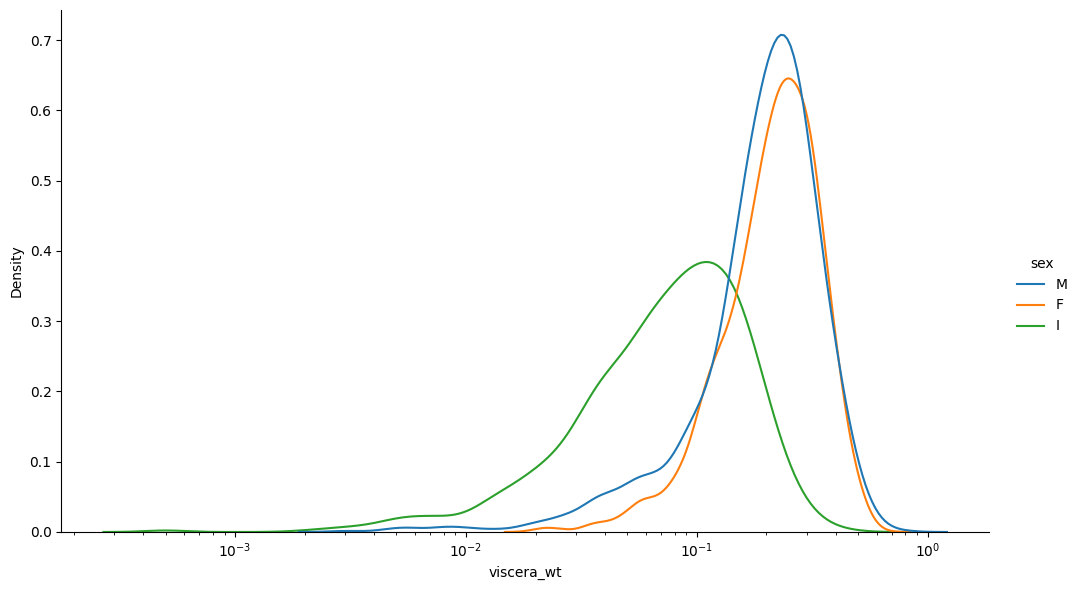

In [61]:
sns.displot(
  data=abalone,
  x="viscera_wt",
  hue="sex",
  kind="kde",
  height=6,
  aspect=1.7,
  log_scale=10
)

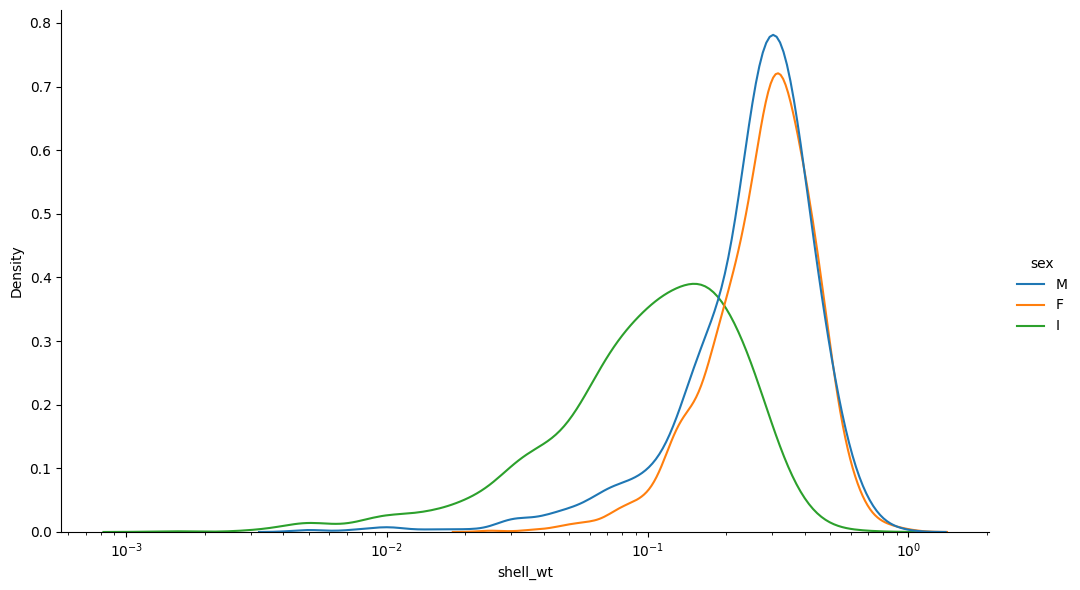

In [62]:
sns.displot(
  data=abalone,
  x="shell_wt",
  hue="sex",
  kind="kde",
  height=6,
  aspect=1.7,
  log_scale=10
)

-> LABEL ENCODING OF 'sex' VALUES FOR TRAINING THE DATASET

In [63]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [64]:
lm = LabelEncoder()
abalone['sex']=lm.fit_transform(abalone['sex'])

-> REVISED DATASET

In [65]:
abalone

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


-> PAIRPLOT TO UNDERSTAND THE RELATION BETWEEN EACH AND EVERY FEATURE OF THE DATASET VISUALLY

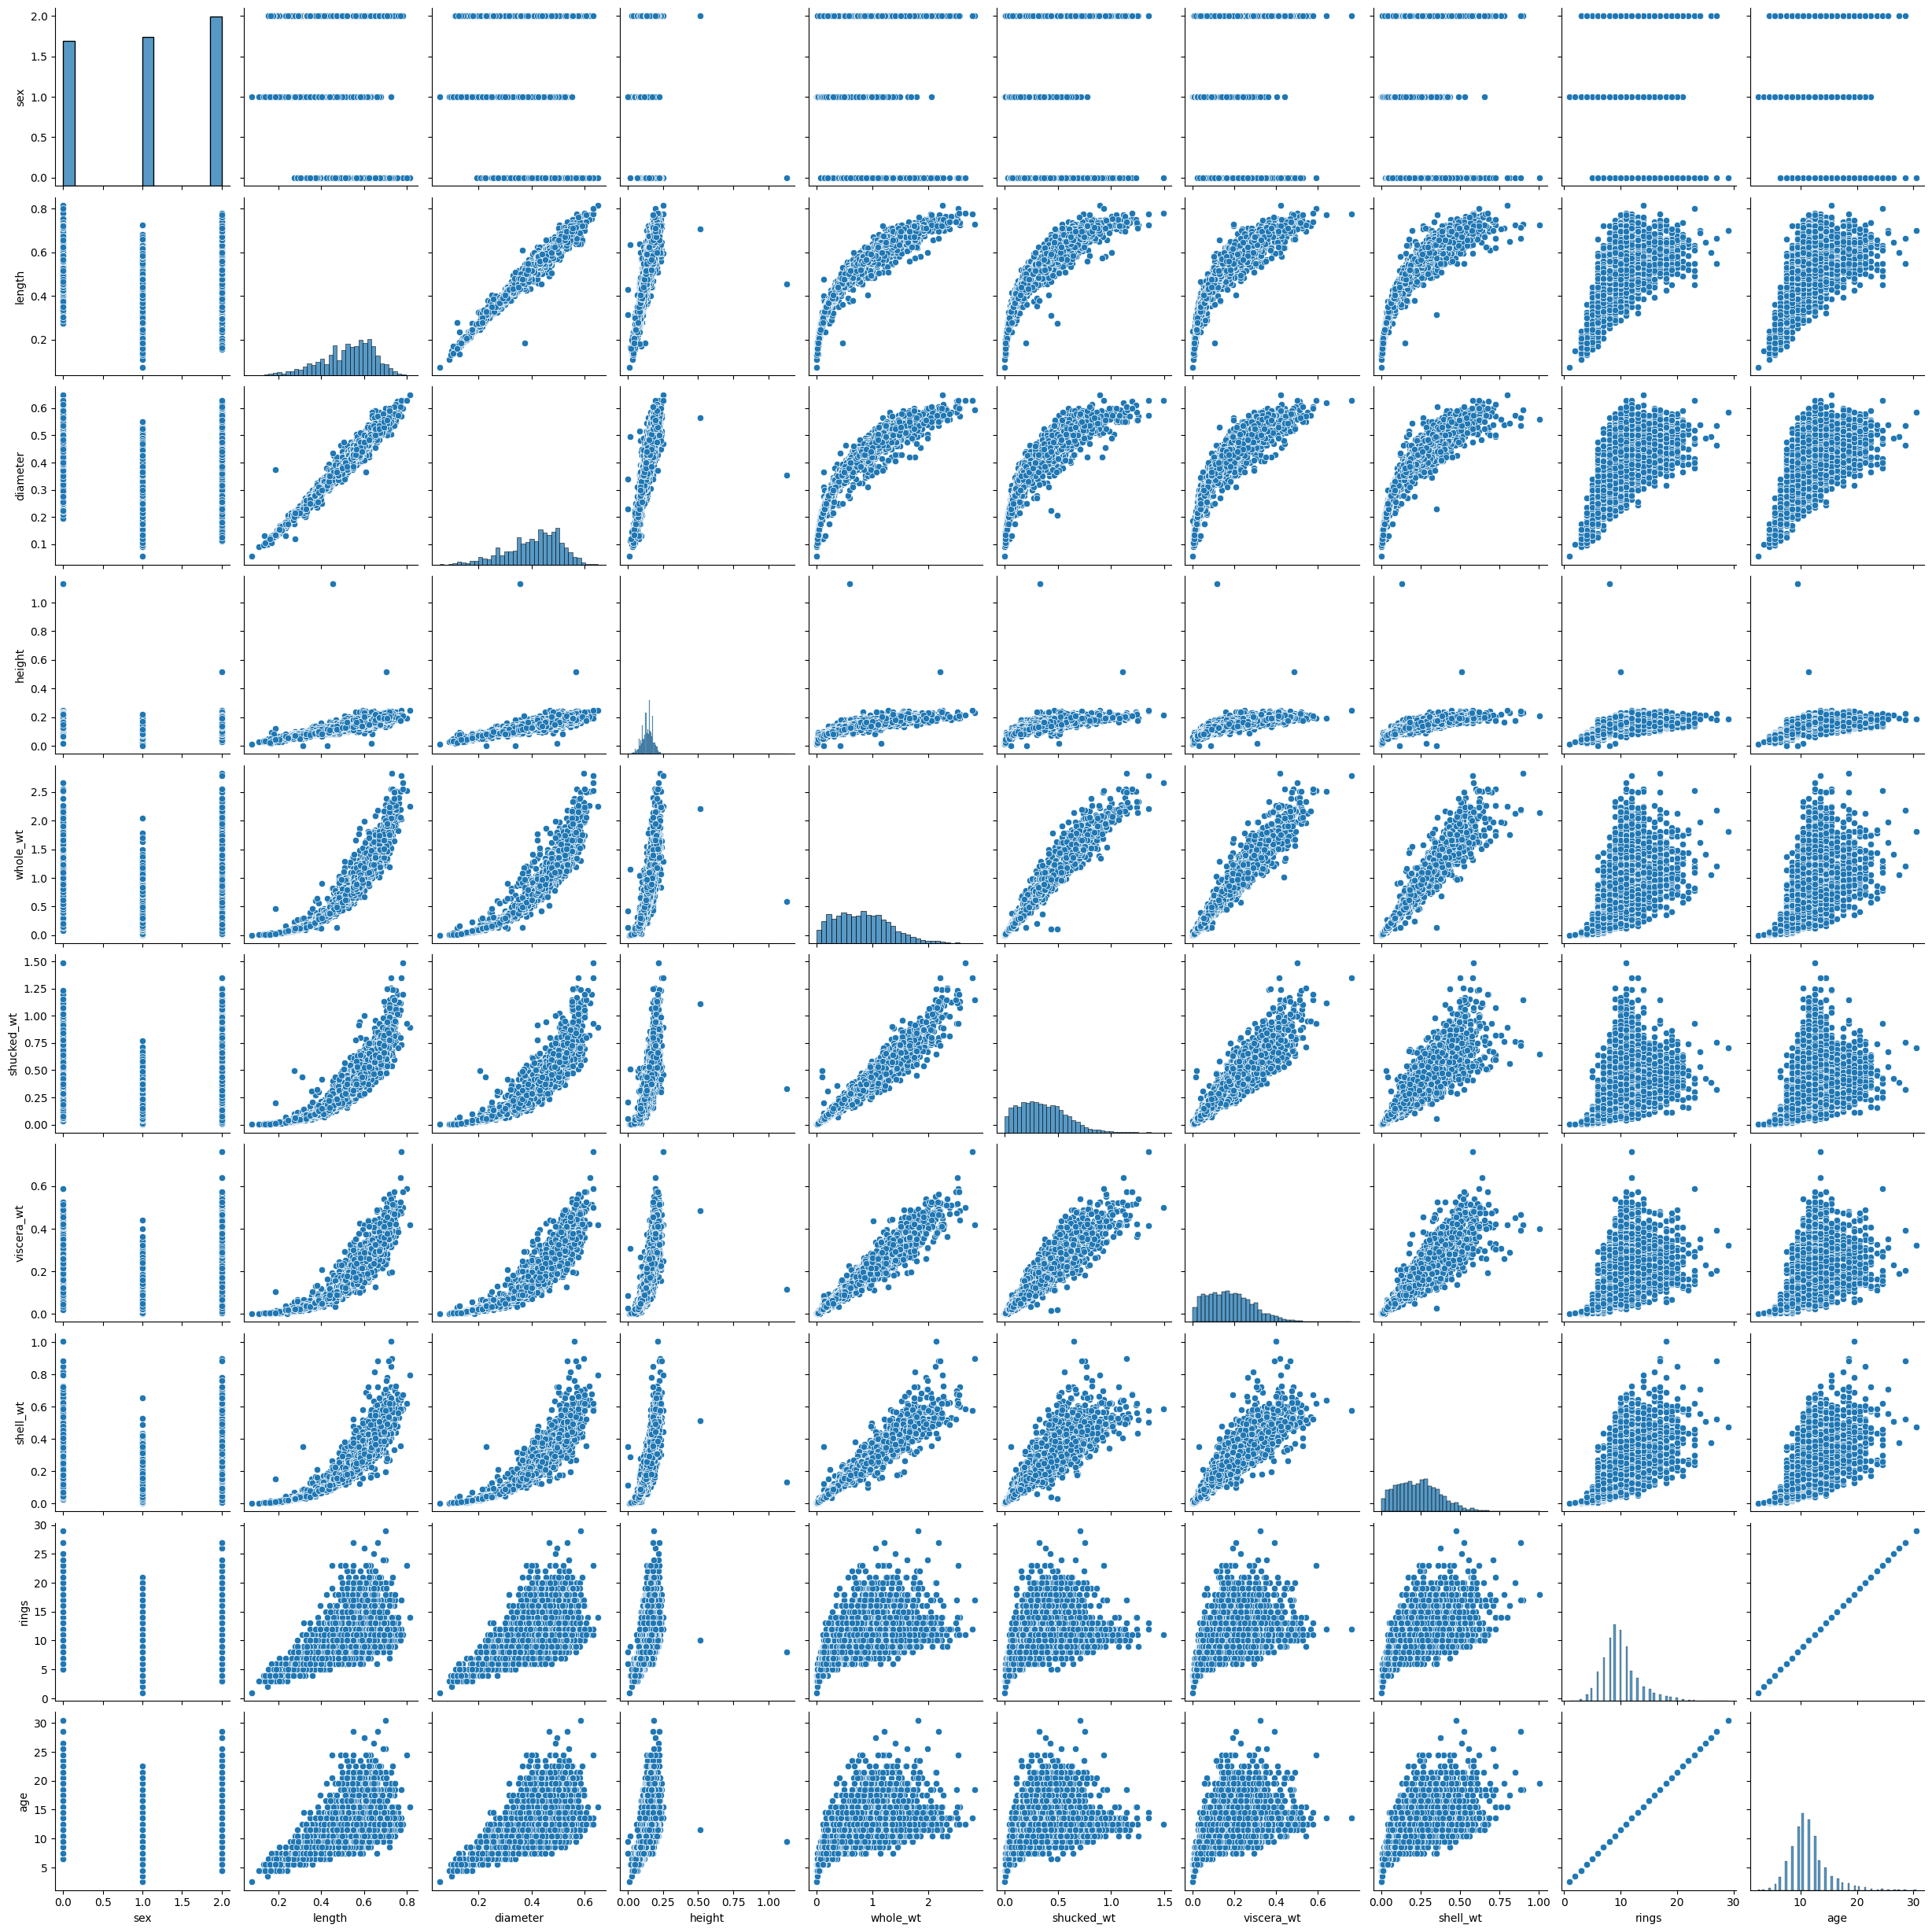

In [66]:
sns.pairplot(abalone)

-> HEATMAP TO FING THE CORRELATION BETWEEN VARIABLES

<AxesSubplot:>

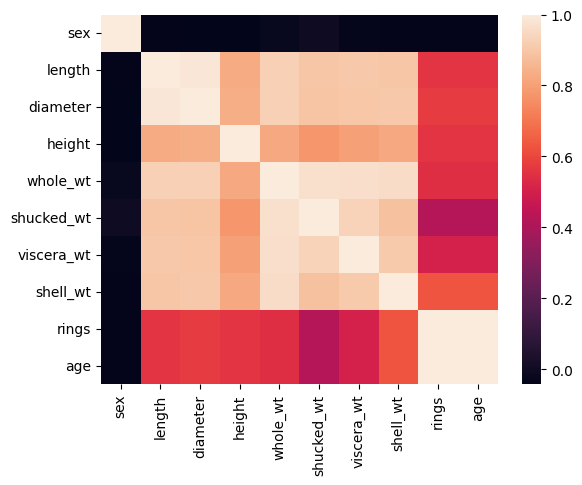

In [67]:
sns.heatmap(abalone.corr())

-> NUMBER OF RINGS vs AGE SINCE IT IS CLEAR FROM THE HEATMAP THAT 'rings' COLUMN HAS HIGHER IMPACT ON "age" COLUMN

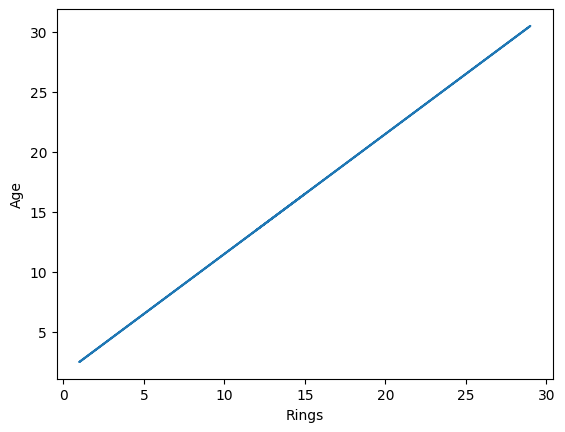

In [68]:
plt.plot(abalone['rings'],abalone['age'])
plt.xlabel('Rings')
plt.ylabel('Age')
plt.show()

-> DROP THE "sex" COLUMN AS THE ABOVE HEATMAP SHOWS THAT IT PLAYS ALMOST NO ROLE IN PREDICTING THE AGE

In [69]:
abalone1= abalone.drop(columns=['sex'])

-> FINALIZED DATASET

In [70]:
abalone1

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


-> INPUT / OUTPUT SPLITTING OF THE FINALIZED DATASET

In [71]:
X=abalone1.drop(columns=['age'])
Y=abalone1['age']

In [72]:
X

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [73]:
Y

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: age, Length: 4177, dtype: float64

-> TEST/TRAIN SPLIT OF X AND Y FOR MODELLING AND TESTING THE DATA

In [74]:
from sklearn.metrics import mean_absolute_error


In [75]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3, random_state = 111)

-> MODEL AND ESTIMATING THE ACCURACY OF THE TRAIN/TEST DATA USING ALGORITHMS LIKE SUPPORT VECTOR REGRESSION, LINEAR REGRESSION AND DECISION TREE REGREESOR

1) SUPPORT VECTOR REGRESSION

In [76]:
from sklearn.svm import SVR
from sklearn import metrics
svr_rbf = SVR(kernel='rbf',gamma='scale', C=1.0, epsilon=0.1)
svr_rbf.fit(xtrain, ytrain) 

SVR()

In [77]:
y_pred = svr_rbf.predict(xtest)

In [78]:
metrics.r2_score(y_pred,ytest)

0.995858010034226

In [79]:
mean_absolute_error(ytest, y_pred)

0.06369853196911936

2) LINEAR REGRESSION

In [80]:
from sklearn.linear_model import LinearRegression


In [81]:
model = LinearRegression()

In [82]:
model.fit(xtrain, ytrain)

LinearRegression()

In [83]:
ypred1=model.predict(xtest)

In [84]:
ypred1

array([10.5, 12.5, 10.5, ..., 10.5, 10.5, 12.5])

In [85]:
metrics.r2_score(ypred1,ytest)

1.0

In [86]:
mean_absolute_error(ytest, ypred1)

5.7157893516587e-16

3) DECISION TREE REGRESSOR

In [87]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(xtrain, ytrain)

DecisionTreeRegressor(random_state=0)

In [88]:
ypred_1=regressor.predict(xtest)

In [89]:
metrics.r2_score(ypred_1,ytest)

0.9990375146126323

In [90]:
mean_absolute_error(ytest, ypred_1)

0.005582137161084529

In [91]:
import numpy as np

-> GRAPHICALLY SHOWING HOW ACCURATE THE RESULTS WERE PREDICTED

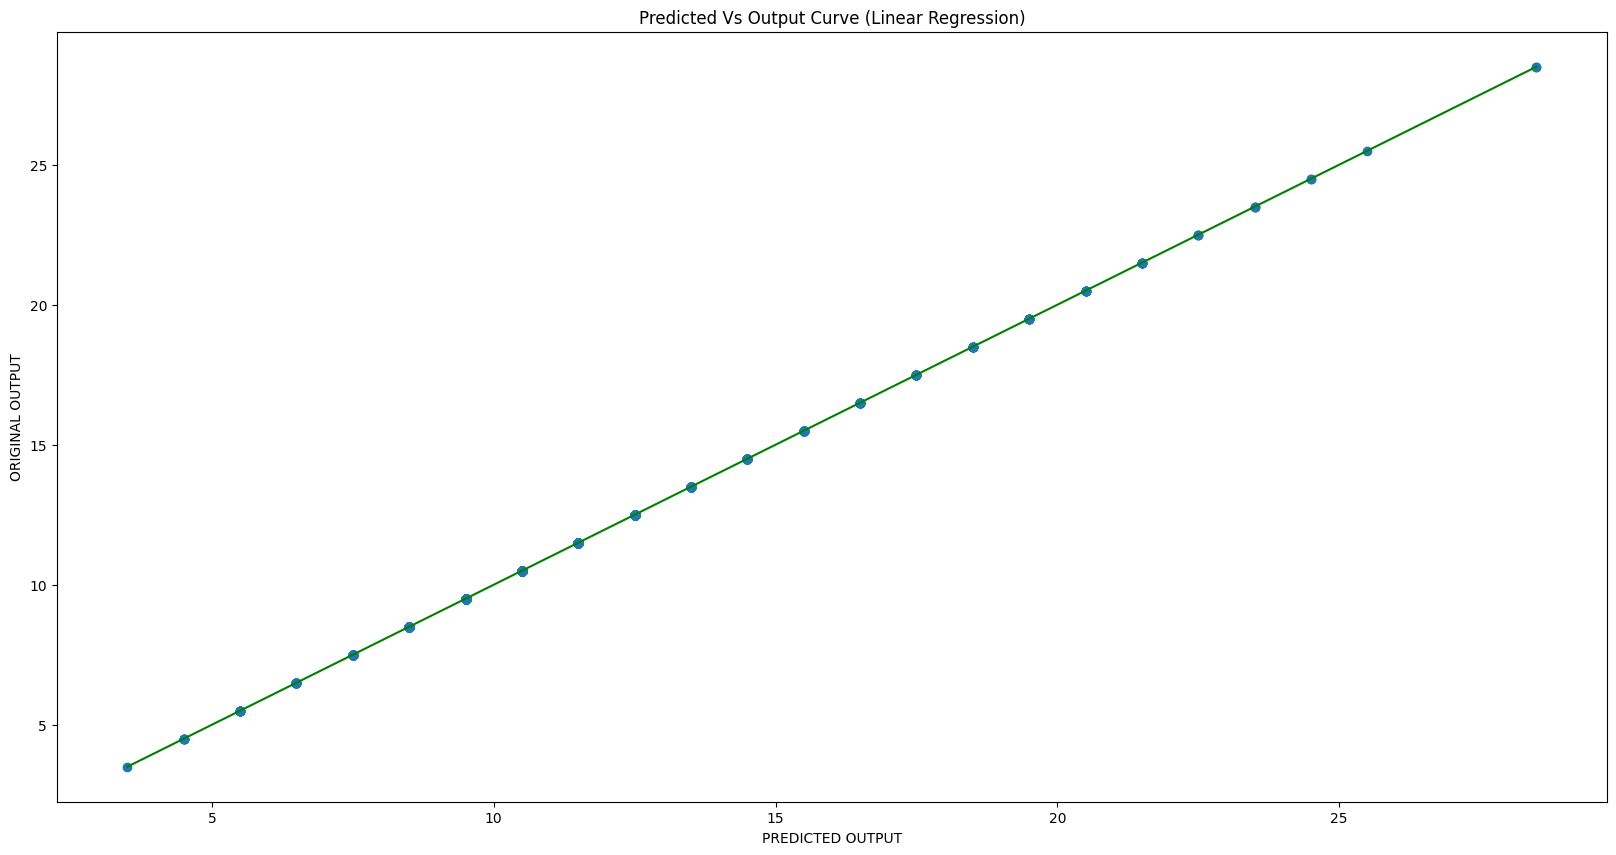

In [92]:
plt.figure(figsize=[20,10])
plt.scatter(ypred1,ytest)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='green')
plt.title('Predicted Vs Output Curve (Linear Regression)')
plt.xlabel('PREDICTED OUTPUT')
plt.ylabel('ORIGINAL OUTPUT')
plt.show()

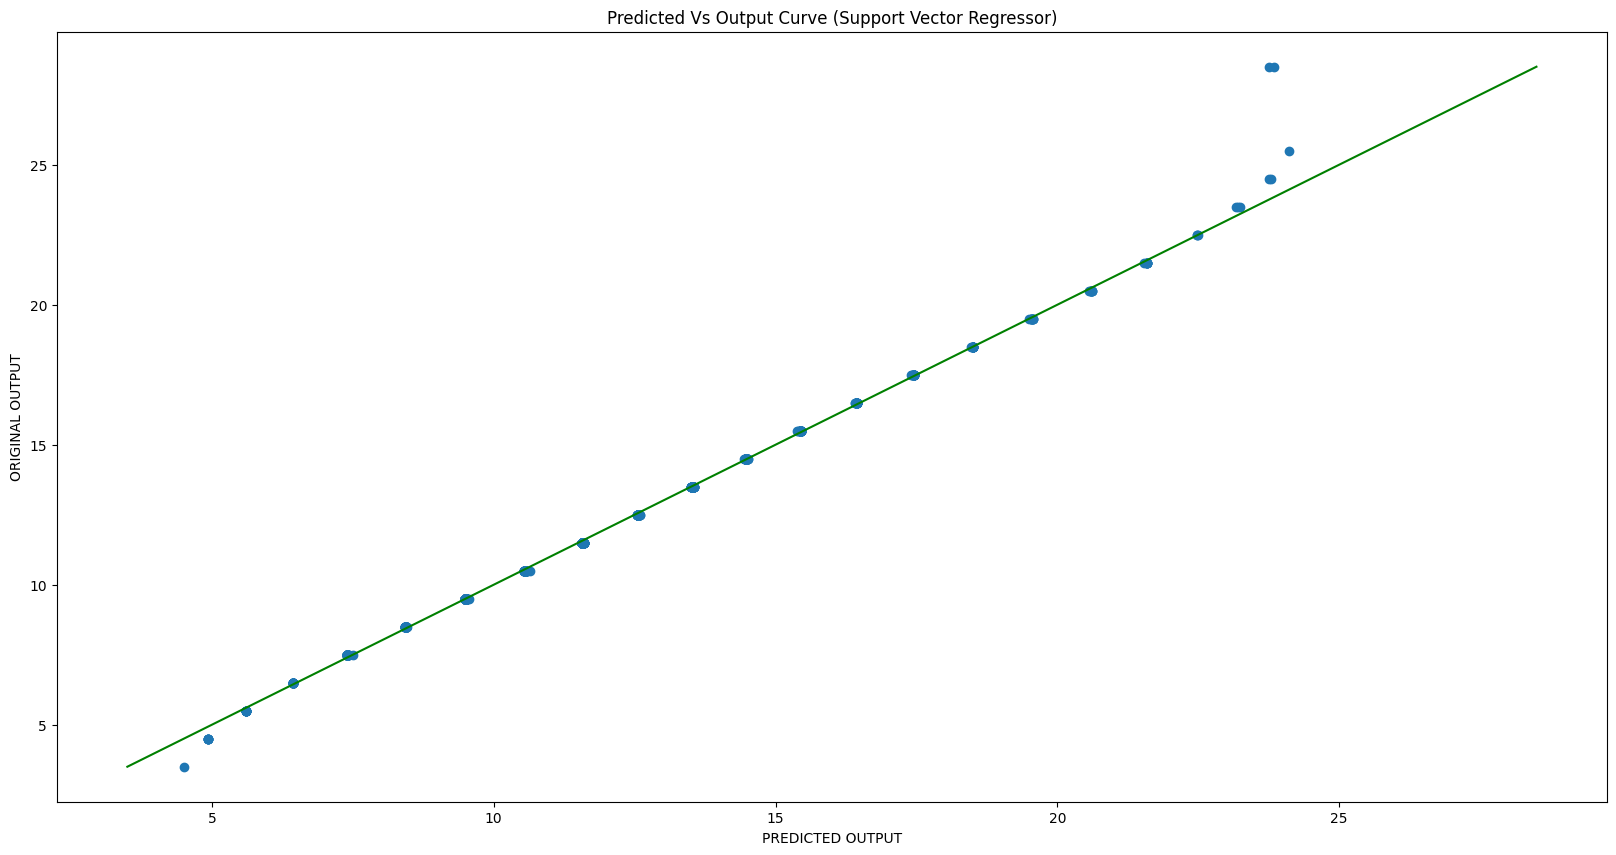

In [93]:
plt.figure(figsize=[20,10])
plt.scatter(y_pred,ytest)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='green')
plt.title('Predicted Vs Output Curve (Support Vector Regressor)')
plt.xlabel('PREDICTED OUTPUT')
plt.ylabel('ORIGINAL OUTPUT')
plt.show()

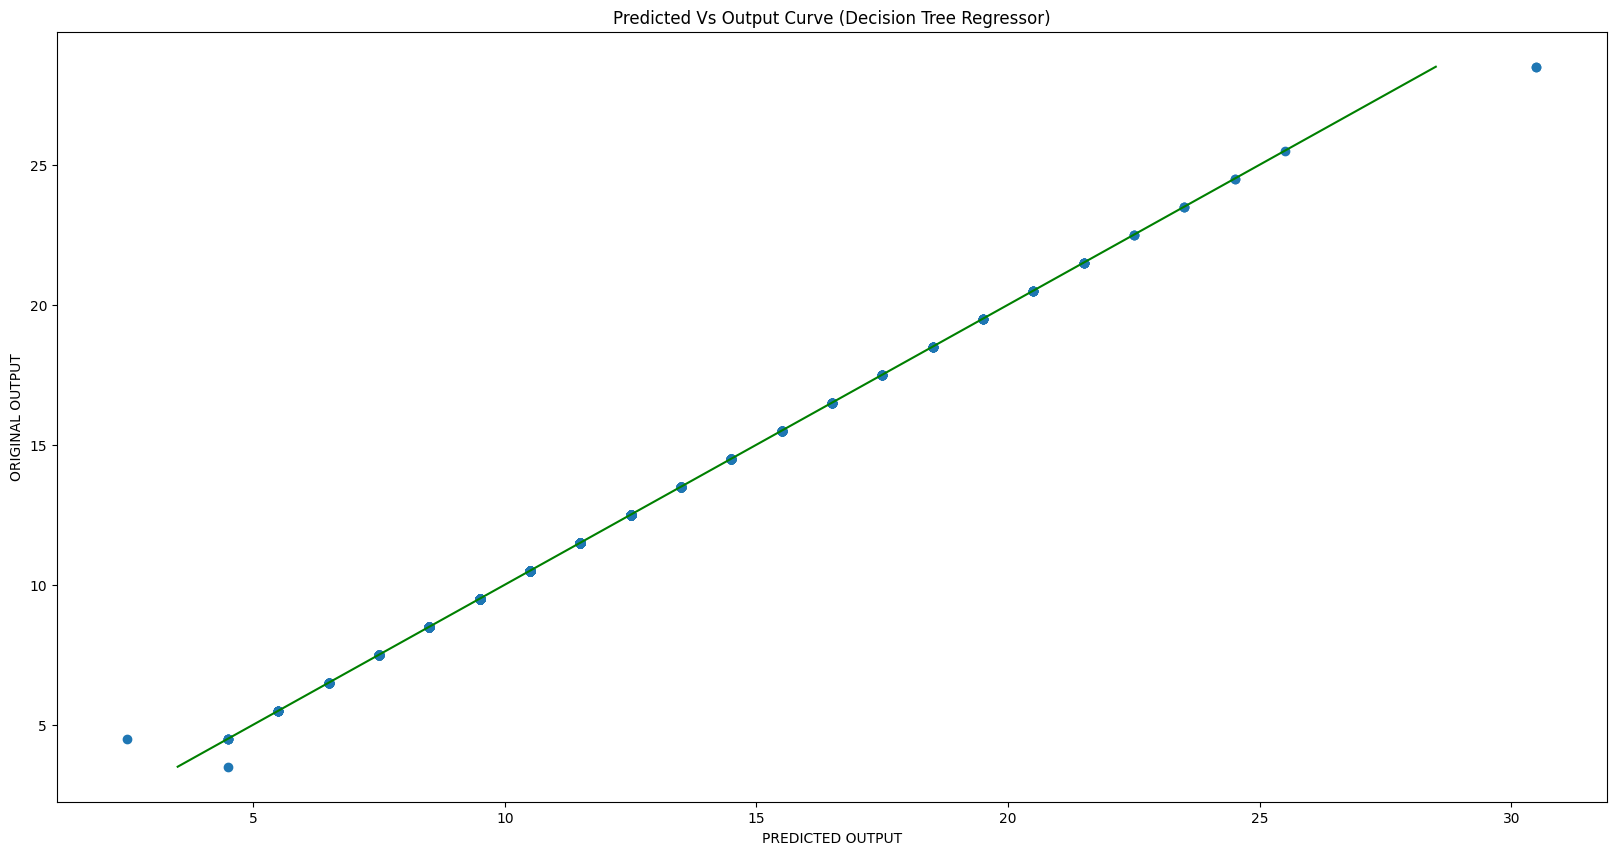

In [94]:
plt.figure(figsize=[20,10])
plt.scatter(ypred_1,ytest)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='green')
plt.title('Predicted Vs Output Curve (Decision Tree Regressor)')
plt.xlabel('PREDICTED OUTPUT')
plt.ylabel('ORIGINAL OUTPUT')
plt.show()